In [ ]:
import pandas as pd
import numpy as np
from tvDatafeed import TvDatafeed, Interval
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import time

plt.style.use('seaborn-darkgrid')

In [ ]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [ ]:
# Create a dictionary containing the forex pairs
forex_pairs = {
    "AUDNZD": "Australian Dollar/New Zealand Dollar",
    "AUDUSD": "Australian Dollar/US Dollar",
    "EURCAD": "Euro/Canadian Dollar",
    "EURCHF": "Euro/Swiss Franc",
    "EURGBP": "Euro/British Pound",
    "EURUSD": "Euro/US Dollar",
    "GBPCAD": "British Pound/Canadian Dollar",
    "GBPCHF": "British Pound/Swiss Franc",
    "GBPUSD": "British Pound/US Dollar",
    "NZDUSD": "New Zealand Dollar/US Dollar",
    "USDCAD": "US Dollar/Canadian Dollar",
    "USDCHF": "US Dollar/Swiss Franc",
    "AUDJPY": "Australian Dollar/Japanese Yen",
    "EURJPY": "Euro/Japanese Yen",
    "GBPJPY": "British Pound/Japanese Yen",
    "NZDJPY": "New Zealand Dollar/Japanese Yen",
    "USDJPY": "US Dollar/Japanese Yen"
}

In [ ]:
# Initialize an empty DataFrame to store the results
df = pd.DataFrame()

# Loop through the forex_pairs dictionary and read in the data for each symbol
for symbol in forex_pairs:
    data = tv.get_hist(symbol=symbol, exchange='OANDA', interval=Interval.in_15_minute, n_bars=5000)
    # Calculate the daily returns
    data['daily_returns'] = data['close'].pct_change()
    # Rename the 'close' column to the symbol name
    data.rename(columns={'close': symbol}, inplace=True)
    # Concatenate the data for this symbol with the existing DataFrame
    df = pd.concat([df, data[[symbol]]], axis=1)
    time.sleep(0.5)  # add a 0.5 second delay between each request
    
# Drop any rows with missing values (i.e. from when the market is closed)
df.dropna(inplace=True)

# Print the resulting DataFrame
df

,AUDNZD,AUDUSD,EURCAD,EURCHF,EURGBP,EURUSD,GBPCAD,GBPCHF,GBPUSD,NZDUSD,USDCAD,USDCHF,AUDJPY,EURJPY,GBPJPY,NZDJPY,USDJPY
datetime,,,,,,,,,,,,,,,,,
2023-02-13 16:30:00,1.09524,0.696560,1.43002,0.985920,0.88346,1.072360,1.618590,1.115990,1.213800,0.63598,1.333500,0.91940,92.231,141.9910,160.7190,84.212,132.4120
2023-02-13 16:45:00,1.09533,0.696600,1.42976,0.985960,0.88340,1.072420,1.618500,1.116080,1.213960,0.63598,1.333200,0.91936,92.246,142.0160,160.7580,84.219,132.4240
2023-02-13 17:00:00,1.09552,0.696580,1.42992,0.986220,0.88356,1.072100,1.618700,1.116140,1.213690,0.63584,1.333650,0.91983,92.260,142.0160,160.7440,84.224,132.4600
2023-02-13 17:15:00,1.09564,0.696670,1.43020,0.986280,0.88348,1.072460,1.618960,1.116390,1.214000,0.63586,1.333580,0.91961,92.258,142.0200,160.7720,84.205,132.4280
2023-02-13 17:30:00,1.09552,0.696640,1.42997,0.986060,0.88344,1.072480,1.618700,1.116040,1.214050,0.63590,1.333290,0.91951,92.256,142.0360,160.7770,84.214,132.4320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26 16:45:00,1.07962,0.660305,1.50562,0.984015,0.88544,1.104050,1.700450,1.111330,1.246885,0.61161,1.363740,0.89129,88.272,147.5865,166.6800,81.758,133.6775
2023-04-26 17:00:00,1.07905,0.660150,1.50546,0.983520,0.88558,1.104040,1.699980,1.111060,1.246760,0.61179,1.363100,0.89081,88.244,147.5620,166.6520,81.786,133.6830
2023-04-26 17:45:00,1.07983,0.660460,1.50517,0.983920,0.88560,1.104140,1.699560,1.111210,1.246760,0.61163,1.363340,0.89118,88.262,147.5440,166.6100,81.742,133.6460


In [ ]:
# Create a correlation matrix using the corr() method in pandas
correlation_matrix = df.corr()

In [ ]:
# Print the correlation matrix
correlation_matrix

,AUDNZD,AUDUSD,EURCAD,EURCHF,EURGBP,EURUSD,GBPCAD,GBPCHF,GBPUSD,NZDUSD,USDCAD,USDCHF,AUDJPY,EURJPY,GBPJPY,NZDJPY,USDJPY
AUDNZD,1.000000,0.737762,-0.654378,-0.075006,0.487798,-0.332565,-0.729961,-0.364120,-0.441697,-0.065864,-0.350077,0.249360,0.862860,0.128046,-0.046869,0.533438,0.492738
AUDUSD,0.737762,1.000000,-0.641157,0.092304,0.165930,-0.130935,-0.608635,-0.031209,-0.166114,0.624973,-0.635167,0.137561,0.706365,-0.119948,-0.186878,0.509575,0.015667
EURCAD,-0.654378,-0.641157,1.000000,-0.289382,-0.245574,0.750970,0.944512,-0.073317,0.738034,-0.190356,0.167982,-0.717615,-0.798718,0.310406,0.416439,-0.738214,-0.498172
EURCHF,-0.075006,0.092304,-0.289382,1.000000,0.008205,-0.358209,-0.251129,0.779584,-0.318171,0.224081,0.159211,0.641875,0.114268,-0.313971,-0.331925,0.256598,0.070000
EURGBP,0.487798,0.165930,-0.245574,0.008205,1.000000,-0.239580,-0.550329,-0.619786,-0.511159,-0.320462,0.041386,0.204108,0.528284,0.309011,-0.047221,0.440394,0.585039
EURUSD,-0.332565,-0.130935,0.750970,-0.358209,-0.239580,1.000000,0.727946,-0.131228,0.956904,0.192617,-0.524743,-0.945752,-0.451056,0.563488,0.680964,-0.447902,-0.506912
GBPCAD,-0.729961,-0.608635,0.944512,-0.251129,-0.550329,0.727946,1.000000,0.147562,0.808842,-0.054414,0.130731,-0.686908,-0.867915,0.161449,0.373421,-0.785713,-0.628498
GBPCHF,-0.364120,-0.031209,-0.073317,0.779584,-0.619786,-0.131228,0.147562,1.000000,0.070290,0.376675,0.099234,0.376013,-0.241523,-0.440798,-0.231848,-0.075231,-0.312206
GBPUSD,-0.441697,-0.166114,0.738034,-0.318171,-0.511159,0.956904,0.808842,0.070290,1.000000,0.267131,-0.477163,-0.897795,-0.557868,0.406171,0.616706,-0.527888,-0.623929
NZDUSD,-0.065864,0.624973,-0.190356,0.224081,-0.320462,0.192617,-0.054414,0.376675,0.267131,1.000000,-0.535561,-0.085977,0.046810,-0.323047,-0.218979,0.137251,-0.545902


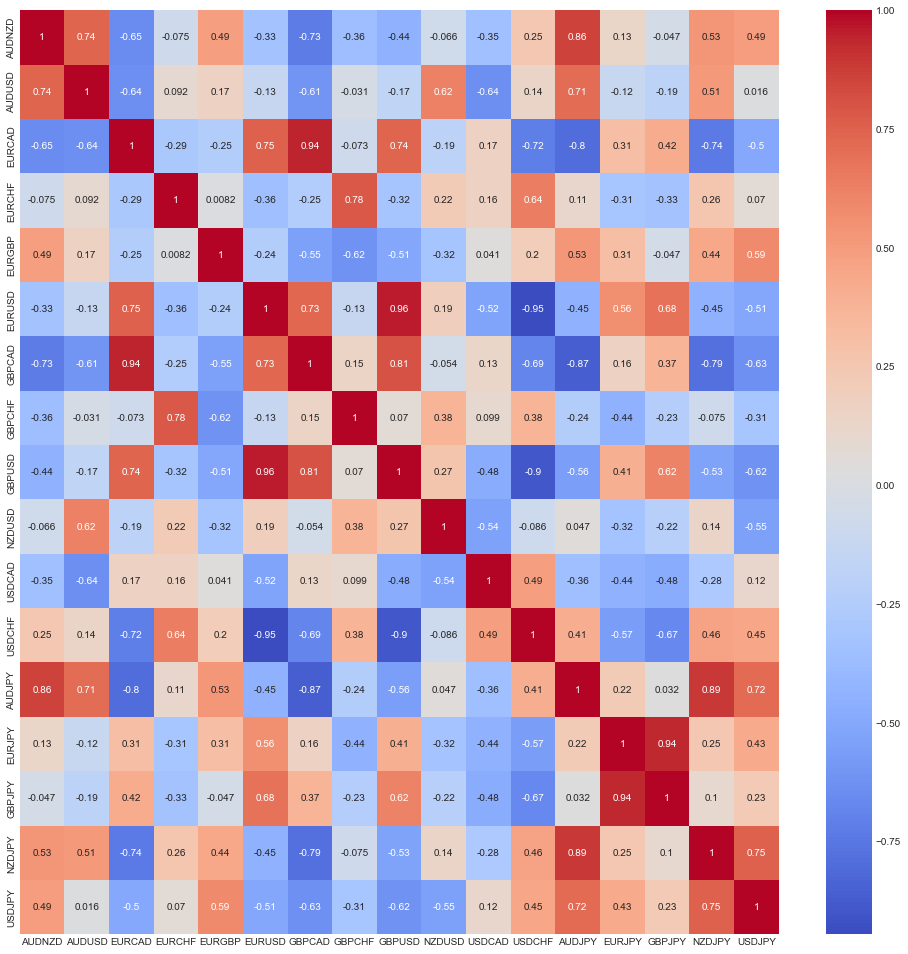

In [ ]:
fig, ax = plt.subplots(figsize=(17, 17))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Save the plot as a PNG file
plt.savefig("./Images/CorrelationMatrix.png")

The heatmap shows the correlation between each currency pair, with brighter colors indicating higher positive correlation and darker colors indicating higher negative correlation. The resulting heatmap suggests that there are some strong positive and negative correlations between certain currency pairs, which could be useful for identifying potential trading opportunities or risk management strategies.

The numbers in the heatmap represent the correlation coefficient between two currency pairs. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfectly negative correlation (i.e. the pairs move in opposite directions), 1 indicating a perfectly positive correlation (i.e. the pairs move in the same direction), and 0 indicating no correlation (i.e. the pairs move independently of each other). The closer the absolute value of the correlation coefficient is to 1, the stronger the correlation between the two pairs.